<a href="https://colab.research.google.com/github/dashoraanjali15/AssignmentRepo/blob/main/product_matching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from tabulate import tabulate

%matplotlib Inline

In [ ]:
df_flipcart=pd.read_csv('flipkart_com-ecommerce_sample.csv')
df_flipcart.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
df_amazon=pd.read_csv('amz_com-ecommerce_sample.csv',encoding='ISO-8859-1')
df_amazon.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,982,438,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32143,29121,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,991,551,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,694,325,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,208,258,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [ ]:
df_flipcart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [ ]:
df_amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   uniq_id                  20000 non-null  object
 1   crawl_timestamp          20000 non-null  object
 2   product_url              20000 non-null  object
 3   product_name             20000 non-null  object
 4   product_category_tree    20000 non-null  object
 5   pid                      20000 non-null  object
 6   retail_price             20000 non-null  int64 
 7   discounted_price         20000 non-null  int64 
 8   image                    19997 non-null  object
 9   is_FK_Advantage_product  20000 non-null  bool  
 10  description              19998 non-null  object
 11  product_rating           20000 non-null  object
 12  overall_rating           20000 non-null  object
 13  brand                    14136 non-null  object
 14  product_specifications   19986 non-nul

In [ ]:
df_flipcart.shape

(20000, 15)

In [ ]:
df_amazon.shape

(20000, 15)

In [ ]:
df_flipcart.isna().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [ ]:
df_amazon.isna().sum()


uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                  0
discounted_price              0
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [ ]:
print("Amazon:- ",df_amazon.columns)

print("Flipkart:- ",df_flipcart.columns)

Amazon:-  Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')
Flipkart:-  Index(['uniq_id', 'crawl_timestamp', 'product_url', 'product_name',
       'product_category_tree', 'pid', 'retail_price', 'discounted_price',
       'image', 'is_FK_Advantage_product', 'description', 'product_rating',
       'overall_rating', 'brand', 'product_specifications'],
      dtype='object')


In [ ]:
# Dropping columns from amazon & flipkart dataset, coz they are unnecessary for the analysis
amazon = df_amazon.drop(columns=['crawl_timestamp', 'product_url','product_category_tree', 'pid','image',
                                 'is_FK_Advantage_product','overall_rating','description','product_specifications'])
flipkart = df_flipcart.drop(columns=['crawl_timestamp', 'product_url','product_category_tree', 'pid','image',
                                 'is_FK_Advantage_product','overall_rating','description','product_specifications'])

In [ ]:
amazon.head()

,uniq_id,product_name,retail_price,discounted_price,product_rating,brand
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,982,438,No rating available,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,32143,29121,No rating available,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,991,551,No rating available,AW
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,694,325,No rating available,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,208,258,No rating available,Sicons


In [ ]:
flipkart.head()

,uniq_id,product_name,retail_price,discounted_price,product_rating,brand
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,999.0,379.0,No rating available,Alisha
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0,No rating available,FabHomeDecor
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,999.0,499.0,No rating available,AW
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,699.0,267.0,No rating available,Alisha
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0,No rating available,Sicons


In [ ]:
amazon = amazon.drop(columns=['brand'])
flipkart = flipkart.drop(columns=['brand'])

In [ ]:
amazon.isna().sum()

uniq_id             0
product_name        0
retail_price        0
discounted_price    0
product_rating      0
dtype: int64

In [ ]:
flipkart.isna().sum()

uniq_id              0
product_name         0
retail_price        78
discounted_price    78
product_rating       0
dtype: int64

In [ ]:
flipkart.dropna(inplace=True)

checking fordiscounts they are offering


In [ ]:
amazon['discount%'] = ((amazon['retail_price'] - amazon['discounted_price'])/amazon['retail_price'])*100

In [ ]:
amazon.head()

,uniq_id,product_name,retail_price,discounted_price,product_rating,discount%
0,c2d766ca982eca8304150849735ffef9,Alisha Solid Women's Cycling Shorts,982,438,No rating available,55.397149
1,7f7036a6d550aaa89d34c77bd39a5e48,FabHomeDecor Fabric Double Sofa Bed,32143,29121,No rating available,9.401736
2,f449ec65dcbc041b6ae5e6a32717d01b,AW Bellies,991,551,No rating available,44.399596
3,0973b37acd0c664e3de26e97e5571454,Alisha Solid Women's Cycling Shorts,694,325,No rating available,53.170029
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,Sicons All Purpose Arnica Dog Shampoo,208,258,No rating available,-24.038462


In [ ]:
big_discount=amazon[amazon['discount%']>80].index
big_discount

Int64Index([   12,    21,    76,   171,   176,   232,   233,   806,   812,
             1130,
            ...
            16831, 17205, 17218, 17219, 17634, 19047, 19081, 19543, 19599,
            19622],
           dtype='int64', length=210)

In [ ]:
amazon = amazon.drop(big_discount)

In [ ]:
flipkart['discount%'] = ((flipkart['retail_price'] - flipkart['discounted_price'])/flipkart['retail_price'])*100

In [ ]:
big_discount_flipkart=flipkart[flipkart['discount%']>90].index
big_discount_flipkart

Int64Index([  806,  2005,  2377,  3210,  4377,  4610,  5535,  5541,  5886,
             5928,  6080,  6368,  6431,  6538,  6545,  6566,  6644,  6760,
             7156,  7284,  7498,  9238, 10181, 10941, 14733, 14777, 15624,
            16195, 16220, 16307, 17205],
           dtype='int64')

In [ ]:
flipkart = flipkart.drop(big_discount_flipkart)

In [ ]:
amazon.shape

(19790, 6)

In [ ]:
flipkart.shape

(19891, 6)

In [ ]:
amazon = amazon.drop(columns=['product_rating'])
flipkart = flipkart.drop(columns=['product_rating'])

In [ ]:
print((amazon['retail_price'] < amazon['discounted_price']).sum())
print((flipkart['retail_price'] < flipkart['discounted_price']).sum())

4247
0


In [ ]:
# Their are 4325 value of discounted price which are greater than the retail_price, dropping them
greater_val = amazon[amazon['retail_price'] < amazon['discounted_price']].index
greater_val

Int64Index([    4,     5,    14,    20,    23,    24,    27,    34,    37,
               39,
            ...
            19809, 19815, 19858, 19870, 19881, 19903, 19958, 19990, 19994,
            19996],
           dtype='int64', length=4247)

In [ ]:
amazon = amazon.drop(greater_val)

In [ ]:
flipkart.isna().sum()

uniq_id             0
product_name        0
retail_price        0
discounted_price    0
discount%           0
dtype: int64

In [ ]:
amazon = amazon.drop(columns=['discount%','uniq_id'])
flipkart = flipkart.drop(columns=['discount%','uniq_id'])

In [ ]:
flipkart = flipkart.rename(columns={'retail_price':'retail_price_FK',
                                    'discounted_price':'discounted_price_at_FK'})
amazon = amazon.rename(columns={
                                'retail_price':'retail_price_AMZ','discounted_price':'discounted_price_at_AMZ'})

In [ ]:
flipkart

,product_name,retail_price_FK,discounted_price_at_FK
0,Alisha Solid Women's Cycling Shorts,999.0,379.0
1,FabHomeDecor Fabric Double Sofa Bed,32157.0,22646.0
2,AW Bellies,999.0,499.0
3,Alisha Solid Women's Cycling Shorts,699.0,267.0
4,Sicons All Purpose Arnica Dog Shampoo,220.0,210.0
...,...,...,...
19995,WallDesign Small Vinyl Sticker,1500.0,730.0
19996,Wallmantra Large Vinyl Stickers Sticker,1429.0,1143.0
19997,Elite Collection Medium Acrylic Sticker,1299.0,999.0
19998,Elite Collection Medium Acrylic Sticker,1499.0,1199.0


In [ ]:
flipkart.dtypes

product_name               object
retail_price_FK           float64
discounted_price_at_FK    float64
dtype: object

In [ ]:
amazon.dtypes

product_name               object
retail_price_AMZ            int64
discounted_price_at_AMZ     int64
dtype: object

In [ ]:

df = pd.merge(flipkart,amazon,on='product_name', how='outer')

In [ ]:
df

,product_name,retail_price_FK,discounted_price_at_FK,retail_price_AMZ,discounted_price_at_AMZ
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,982.0,438.0
1,Alisha Solid Women's Cycling Shorts,999.0,379.0,694.0,325.0
2,Alisha Solid Women's Cycling Shorts,999.0,379.0,1198.0,602.0
3,Alisha Solid Women's Cycling Shorts,999.0,379.0,1197.0,542.0
4,Alisha Solid Women's Cycling Shorts,999.0,379.0,990.0,479.0
...,...,...,...,...,...
97648,ELITE COLLECTION MEDIUM ACRYLIC STICKER,NaN,NaN,1282.0,1164.0
97649,ELITE COLLECTION MEDIUM ACRYLIC STICKER,NaN,NaN,1284.0,1196.0
97650,ELITE COLLECTION MEDIUM ACRYLIC STICKER,NaN,NaN,1492.0,1364.0
97651,ELITE COLLECTION MEDIUM ACRYLIC STICKER,NaN,NaN,1484.0,1247.0


In [ ]:
df.shape

(97653, 5)

In [ ]:
df.isna().sum()



product_name                  0
retail_price_FK            2808
discounted_price_at_FK     2808
retail_price_AMZ           6314
discounted_price_at_AMZ    6314
dtype: int64

In [ ]:
# Dropping the null values, as they've been created by the outer joi
# Drop Duplicates present in the dataset


In [ ]:
# Dropping the null values, as they've been created by the outer join
df.dropna(inplace=True)
# Drop Duplicates present in the dataset
df.drop_duplicates(inplace=True)

In [ ]:
df

,product_name,retail_price_FK,discounted_price_at_FK,retail_price_AMZ,discounted_price_at_AMZ
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,982.0,438.0
1,Alisha Solid Women's Cycling Shorts,999.0,379.0,694.0,325.0
2,Alisha Solid Women's Cycling Shorts,999.0,379.0,1198.0,602.0
3,Alisha Solid Women's Cycling Shorts,999.0,379.0,1197.0,542.0
4,Alisha Solid Women's Cycling Shorts,999.0,379.0,990.0,479.0
...,...,...,...,...,...
91628,Shwetna.com Checkered Women's Straight Kurta,1750.0,850.0,1735.0,998.0
91629,Baalaa Striped Women's Straight Kurta,899.0,499.0,889.0,565.0
92863,GEMKOLABWELL G-S-725-14,6590.0,3345.0,6586.0,3967.0
93646,NYN 80158,869.0,199.0,856.0,229.0


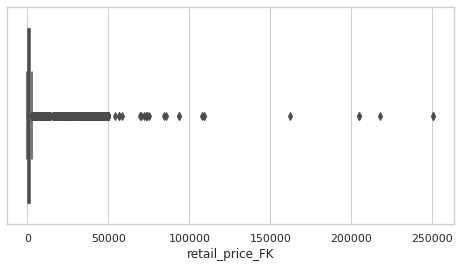

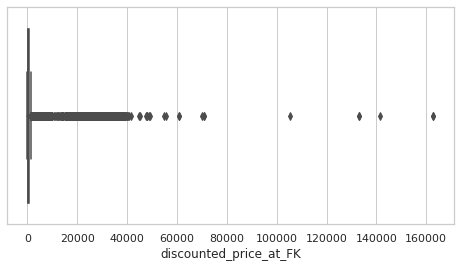

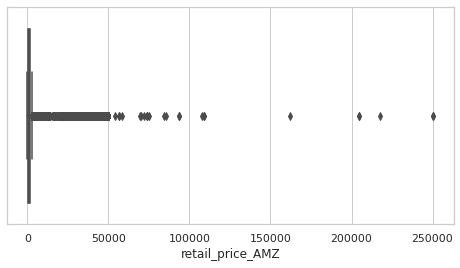

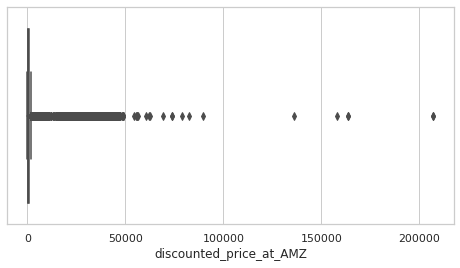

In [ ]:
numerical_df =df.select_dtypes(exclude=['object'])

for column in numerical_df:
    plt.figure(figsize=(8, 4))
    sns.set_theme(style="whitegrid")
    sns.boxplot(numerical_df[column])


In [ ]:
df.describe()

,retail_price_FK,discounted_price_at_FK,retail_price_AMZ,discounted_price_at_AMZ
count,35195.00000,35195.000000,35195.000000,35195.00000
mean,2607.52587,1574.904219,2613.553488,1879.84387
std,7573.03566,5429.073181,7626.445416,6530.26989
min,59.00000,41.000000,46.000000,46.00000
25%,627.00000,299.000000,630.000000,358.00000
50%,949.00000,420.000000,942.000000,503.00000
75%,1566.50000,749.000000,1575.000000,875.00000
max,250500.00000,162825.000000,250483.000000,207175.00000


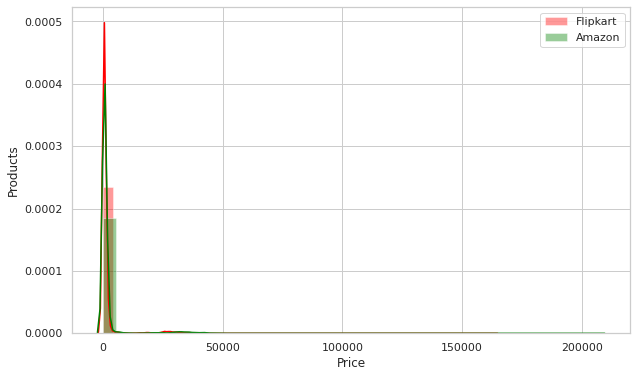

In [ ]:
plt.figure(figsize=(10, 6))
sns.distplot(df.discounted_price_at_FK,color='red', label="Flipkart", kde=True, bins=40)
sns.distplot(df.discounted_price_at_AMZ,color='green', label="Amazon", kde=True, bins=40)
plt.legend()
plt.xlabel('Price')
plt.ylabel('Products')
plt.show()

,product_name,retail_price_FK,discounted_price_at_FK,retail_price_AMZ,discounted_price_at_AMZ
0,Alisha Solid Women's Cycling Shorts,999.0,379.0,982.0,438.0
1,Alisha Solid Women's Cycling Shorts,999.0,379.0,694.0,325.0
2,Alisha Solid Women's Cycling Shorts,999.0,379.0,1198.0,602.0
3,Alisha Solid Women's Cycling Shorts,999.0,379.0,1197.0,542.0
4,Alisha Solid Women's Cycling Shorts,999.0,379.0,990.0,479.0
...,...,...,...,...,...
91628,Shwetna.com Checkered Women's Straight Kurta,1750.0,850.0,1735.0,998.0
91629,Baalaa Striped Women's Straight Kurta,899.0,499.0,889.0,565.0
92863,GEMKOLABWELL G-S-725-14,6590.0,3345.0,6586.0,3967.0
93646,NYN 80158,869.0,199.0,856.0,229.0
